## Feature Selection by Mutual Information Statistics.
###  Dataset - Numerical input data and a Numerical target variable

In [6]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split

In [7]:
house_dataset = pd.read_csv('D:\Data for Preprocessing\Housing.csv')

In [8]:
house_dataset.head(3)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420.0,4.0,2.0,3.0,yes,no,no,no,yes,2.0,yes,furnished,1330000
1,8960.0,4.0,4.0,4.0,yes,no,no,no,yes,3.0,no,furnished,1225000
2,9960.0,3.0,2.0,2.0,yes,no,yes,no,no,2.0,yes,semi-furnished,1225000


In [9]:
house_dataset.dropna(axis=0, inplace=True)

In [10]:
house_dataset.replace({'yes': 1, 'no': 0}, inplace=True)

In [11]:
house_dataset = pd.get_dummies(house_dataset, columns=['furnishingstatus'], prefix=['furnishingstatus'])

In [12]:
house_dataset

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420.0,4.0,2.0,3.0,1,0,0,0,1,2.0,1,1330000,1,0,0
1,8960.0,4.0,4.0,4.0,1,0,0,0,1,3.0,0,1225000,1,0,0
2,9960.0,3.0,2.0,2.0,1,0,1,0,0,2.0,1,1225000,0,1,0
3,7500.0,4.0,2.0,2.0,1,0,1,0,1,3.0,1,1221500,1,0,0
4,7420.0,4.0,1.0,2.0,1,1,1,0,1,2.0,0,1141000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,3000.0,2.0,1.0,1.0,1,0,1,0,0,2.0,0,182000,0,0,1
550,2400.0,3.0,1.0,1.0,0,0,0,0,0,0.0,0,176715,0,1,0
551,3620.0,2.0,1.0,1.0,1,0,0,0,0,0.0,0,175000,0,0,1
552,2910.0,3.0,1.0,1.0,0,0,0,0,0,0.0,0,175000,1,0,0


In [13]:
X  = house_dataset.loc[: , ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
        'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'] ] 
y = house_dataset['price']

In [16]:
# Split the Data into Train and Test Sets

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [17]:
# Configure to select all features
fs = SelectKBest(score_func=mutual_info_regression, k='all')

# Learn relationship from training dataset
fs.fit(X_train, y_train)

# Transform train input data
X_train_fs = fs.transform(X_train)

# Transform test input 
X_test_fs = fs.transform(X_test)

In [18]:
fs_score = pd.DataFrame(fs.scores_)
fs_score

,0
0,0.243939
1,0.102491
2,0.160505
3,0.136915
4,0.078684
5,0.110294
6,0.049559
7,0.007530
8,0.092763
9,0.168120


In [19]:
fs_score.index = X.columns
fs_score

,0
area,0.243939
bedrooms,0.102491
bathrooms,0.160505
stories,0.136915
mainroad,0.078684
guestroom,0.110294
basement,0.049559
hotwaterheating,0.007530
airconditioning,0.092763
parking,0.168120


In [20]:
fs_score.rename({0:'Score'}, axis=1, inplace=True)
fs_score.sort_values(by = ['Score'],ascending=False, inplace=True)
fs_score

,Score
area,0.243939
parking,0.168120
bathrooms,0.160505
stories,0.136915
furnishingstatus_unfurnished,0.112402
guestroom,0.110294
bedrooms,0.102491
airconditioning,0.092763
prefarea,0.079630
mainroad,0.078684


<AxesSubplot:>

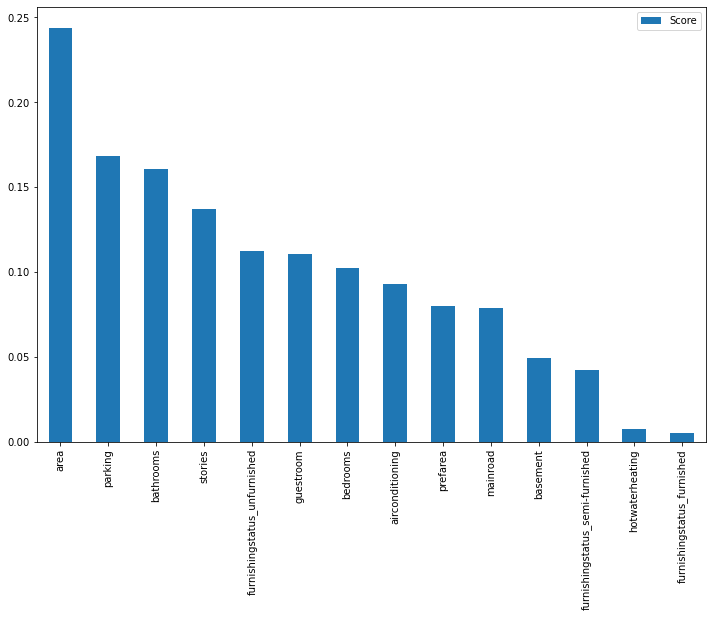

In [21]:
fs_score.plot(kind = 'bar', figsize=(12,8))

In [22]:
fs_score/fs_score.sum()*100

,Score
area,17.545964
parking,12.092427
bathrooms,11.544729
stories,9.847947
furnishingstatus_unfurnished,8.084818
guestroom,7.933144
bedrooms,7.371945
airconditioning,6.672229
prefarea,5.727588
mainroad,5.659514


In [24]:
cum_fs_score = fs_score.cumsum()
Perc_cum_fs_score = (cum_fs_score/fs_score.sum())*100
Perc_cum_fs_score

,Score
area,17.545964
parking,29.638391
bathrooms,41.183120
stories,51.031066
furnishingstatus_unfurnished,59.115884
guestroom,67.049028
bedrooms,74.420973
airconditioning,81.093202
prefarea,86.820791
mainroad,92.480305


In [25]:
# Important feature based upon 85% of Total Score 
Perc_cum_fs_score[Perc_cum_fs_score['Score'] <= 85]

,Score
area,17.545964
parking,29.638391
bathrooms,41.183120
stories,51.031066
furnishingstatus_unfurnished,59.115884
guestroom,67.049028
bedrooms,74.420973
airconditioning,81.093202
